#### Import simulator and validator

In [1]:
from app.model.NSNP import NumericalSNPSystem
from app.middleware.nsnp_validation import NSNPSchema

#### Import helper libraries

In [2]:
import json, time, glob, re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def next_config_average_time(file):
    with open(file, 'r') as f:
            data = json.load(f)

    schema = NSNPSchema()
    system = NumericalSNPSystem(
        schema.load({
            'neurons' : data['nodes'],
            'syn' : data['edges']
        })
    )

    # Initial simulation
    system.simulate(branch='initial')

    # Get next config
    state_graph = system.get_state_graph()
    initial_config = state_graph['nodes'][0]
    next_config = initial_config['next'][0]
    time_list = []

    for i in range(5):
        start = time.time()
        config_details = system.next(next_config, None)
        end = time.time()
        
        next_config = config_details['next']
        elapsed_time = end - start
        time_list.append(elapsed_time)

    return (np.mean(time_list), time_list)

##### Chain - one spike

In [24]:
oc_pattern = r'app\\tests\\chain\\one-chain-(\d+).json'
oc_files = glob.glob('app\\tests\\chain\\one-chain-*.json')
oc_files = list(filter(lambda x: re.match(oc_pattern, x), oc_files))
oc_avg_times = []

for file in oc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(oc_pattern, file)
    nodes = int(match.group(1))
    oc_avg_times.append([nodes, average_time])

oc_avg_times.sort(key=lambda x: x[0])
oc_avg_times = pd.DataFrame(oc_avg_times, columns=['nodes', 'average_time'])
oc_avg_times

,nodes,average_time
0,50,0.002800
1,100,0.010800
2,150,0.026584
3,200,0.041824
4,250,0.063200
5,300,0.103998
6,350,0.130200
7,400,0.161026
8,450,0.204798
9,500,0.241894


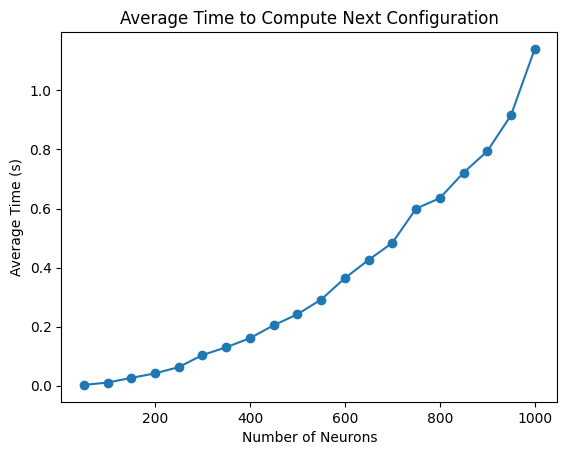

In [25]:
# plot with matplotlib
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()


##### Chain - one spike loop

In [31]:
ocl_pattern = r'app\\tests\\chain\\one-chain-(\d+)-loop.json'
ocl_files = glob.glob('app\\tests\\chain\\one-chain-*.json')
ocl_files = list(filter(lambda x: re.match(ocl_pattern, x), ocl_files))
ocl_avg_times = []

for file in ocl_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ocl_pattern, file)
    nodes = int(match.group(1))
    ocl_avg_times.append([nodes, average_time])

ocl_avg_times.sort(key=lambda x: x[0])
ocl_avg_times = pd.DataFrame(ocl_avg_times, columns=['nodes', 'average_time'])
ocl_avg_times

,nodes,average_time
0,50,0.001800
1,100,0.007200
2,150,0.016200
3,200,0.030200
4,250,0.055600
5,300,0.067000
6,350,0.087600
7,400,0.121000
8,450,0.142600
9,500,0.178001


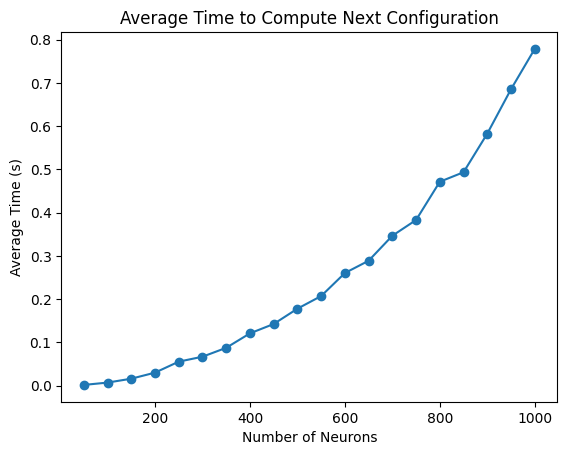

In [32]:
# plot with matplotlib
fig, ax = plt.subplots()
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Chain - all spike

In [37]:
ac_pattern = r'app\\tests\\chain\\all-chain-(\d+).json'
ac_files = glob.glob('app\\tests\\chain\\all-chain-*.json')
ac_files = list(filter(lambda x: re.match(ac_pattern, x), ac_files))
ac_avg_times = []

for file in ac_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ac_pattern, file)
    nodes = int(match.group(1))
    ac_avg_times.append([nodes, average_time])

ac_avg_times.sort(key=lambda x: x[0])
ac_avg_times = pd.DataFrame(ac_avg_times, columns=['nodes', 'average_time'])
ac_avg_times

,nodes,average_time
0,50,0.002800
1,100,0.011600
2,150,0.020695
3,200,0.036600
4,250,0.060800
5,300,0.094000
6,350,0.121200
7,400,0.156599
8,450,0.186764
9,500,0.255396


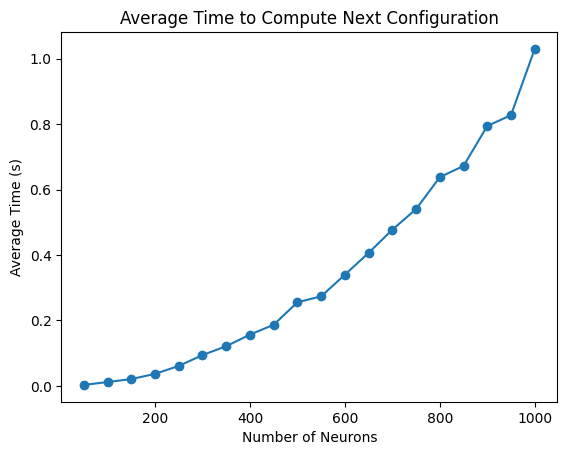

In [38]:
fig, ax = plt.subplots()
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

#### Chain - all spike loop

In [39]:
acl_pattern = r'app\\tests\\chain\\all-chain-(\d+)-loop.json'
acl_files = glob.glob('app\\tests\\chain\\all-chain-*.json')
acl_files = list(filter(lambda x: re.match(acl_pattern, x), acl_files))
acl_avg_times = []

for file in acl_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(acl_pattern, file)
    nodes = int(match.group(1))
    acl_avg_times.append([nodes, average_time])

acl_avg_times.sort(key=lambda x: x[0])
acl_avg_times = pd.DataFrame(acl_avg_times, columns=['nodes', 'average_time'])
acl_avg_times

,nodes,average_time
0,50,0.001800
1,100,0.006795
2,150,0.014600
3,200,0.029601
4,250,0.046200
5,300,0.065401
6,350,0.082800
7,400,0.132400
8,450,0.184999
9,500,0.190000


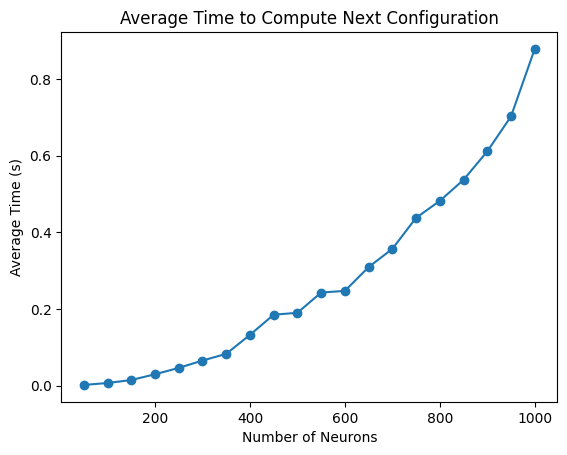

In [40]:
fig, ax = plt.subplots()
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Complete - Simple

In [41]:
sc_pattern = r'app\\tests\\complete\\simple-complete-(\d+).json'
sc_files = glob.glob('app\\tests\\complete\\simple-complete-*.json')
sc_files = list(filter(lambda x: re.match(sc_pattern, x), sc_files))
sc_avg_times = []

for file in sc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(sc_pattern, file)
    nodes = int(match.group(1))
    if nodes >= 50:
        sc_avg_times.append([nodes, average_time])    

sc_avg_times.sort(key=lambda x: x[0])
sc_avg_times = pd.DataFrame(sc_avg_times, columns=['nodes', 'average_time'])
sc_avg_times

,nodes,average_time
0,50,0.002399
1,100,0.010800
2,150,0.046000
3,200,0.038400
4,250,0.059800
5,300,0.095195
6,350,0.129600
7,400,0.157200
8,450,0.194199
9,500,0.257800


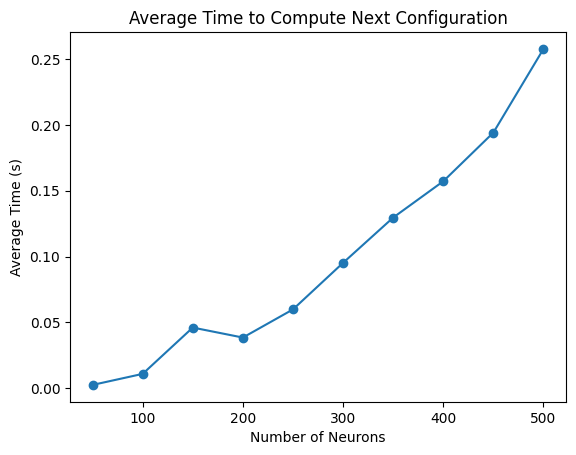

In [42]:
fig, ax = plt.subplots()
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Complete - Benchmark

In [43]:
bc_pattern = r'app\\tests\\complete\\benchmark-complete-(\d+).json'
bc_files = glob.glob('app\\tests\\complete\\benchmark-complete-*.json')
bc_files = list(filter(lambda x: re.match(bc_pattern, x), bc_files))
bc_avg_times = []

for file in bc_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(bc_pattern, file)
    nodes = int(match.group(1))
    if nodes >= 50:
        bc_avg_times.append([nodes, average_time])

bc_avg_times.sort(key=lambda x: x[0])
bc_avg_times = pd.DataFrame(bc_avg_times, columns=['nodes', 'average_time'])
bc_avg_times

,nodes,average_time
0,50,0.009800
1,100,0.042000
2,150,0.184630
3,200,0.233829
4,250,0.293799
5,300,0.432401
6,350,0.584800
7,400,0.704199
8,450,0.876800
9,500,1.136200


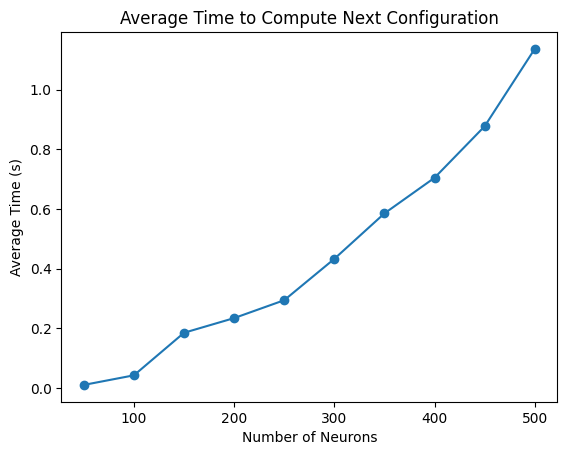

In [44]:
fig, ax = plt.subplots()
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

In [45]:
sc_10_50_pattern = r'app\\tests\\complete\\simple-complete-(\d+).json'
sc_10_50_files = glob.glob('app\\tests\\complete\\simple-complete-*.json')
sc_10_50_files = list(filter(lambda x: re.match(sc_10_50_pattern, x), sc_10_50_files))
sc_10_50_avg_times = []

for file in sc_10_50_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(sc_10_50_pattern, file)
    nodes = int(match.group(1))
    if nodes >= 10 and nodes <= 50:
        sc_10_50_avg_times.append([nodes, average_time])

sc_10_50_avg_times.sort(key=lambda x: x[0])
sc_10_50_avg_times = pd.DataFrame(sc_10_50_avg_times, columns=['nodes', 'average_time'])
sc_10_50_avg_times

,nodes,average_time
0,10,0.0000
1,20,0.0012
2,30,0.0010
3,40,0.0018
4,50,0.0024


In [46]:
bc_10_50_pattern = r'app\\tests\\complete\\benchmark-complete-(\d+).json'
bc_10_50_files = glob.glob('app\\tests\\complete\\benchmark-complete-*.json')
bc_10_50_files = list(filter(lambda x: re.match(bc_10_50_pattern, x), bc_10_50_files))
bc_10_50_avg_times = []

for file in bc_10_50_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(bc_10_50_pattern, file)
    nodes = int(match.group(1))
    if nodes >= 10 and nodes <= 50:
        bc_10_50_avg_times.append([nodes, average_time])

bc_10_50_avg_times.sort(key=lambda x: x[0])
bc_10_50_avg_times = pd.DataFrame(bc_10_50_avg_times, columns=['nodes', 'average_time'])
bc_10_50_avg_times

,nodes,average_time
0,10,0.000600
1,20,0.001800
2,30,0.003800
3,40,0.007200
4,50,0.013799


##### Subset Sum

In [52]:
ss_pattern = r'app\\tests\\subsetsum\\subset-(\d+)-(\d+).json'
ss_files = glob.glob('app\\tests\\subsetsum\\subset-*.json')
ss_files = list(filter(lambda x: re.match(ss_pattern, x), ss_files))
ss_avg_times = []

for file in ss_files:
    average_time, time_list = next_config_average_time(file)
    match = re.match(ss_pattern, file)
    V = int(match.group(1))
    S = int(match.group(2))
    ss_avg_times.append([V, average_time])

ss_avg_times.sort(key=lambda x: x[0])
ss_avg_times = pd.DataFrame(ss_avg_times, columns=['V', 'average_time'])
ss_avg_times

,V,average_time
0,50,0.014005
1,100,0.058400
2,150,0.129785
3,200,0.209800
4,250,0.335000
5,300,0.510400
6,350,0.692796
7,400,0.888000
8,450,1.167600
9,500,1.634196


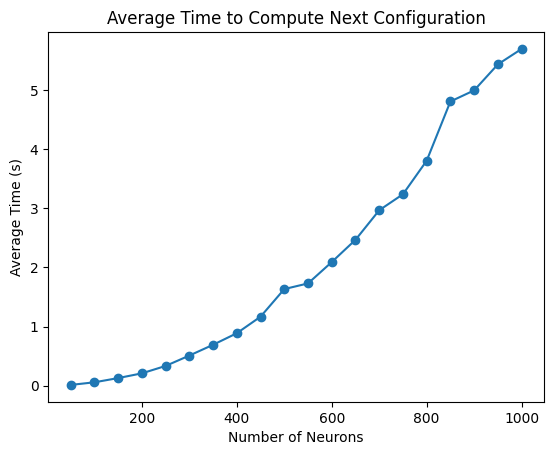

In [54]:
fig, ax = plt.subplots()
ax.plot(ss_avg_times['V'], ss_avg_times['average_time'], 'o-')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
plt.show()

##### Plot together

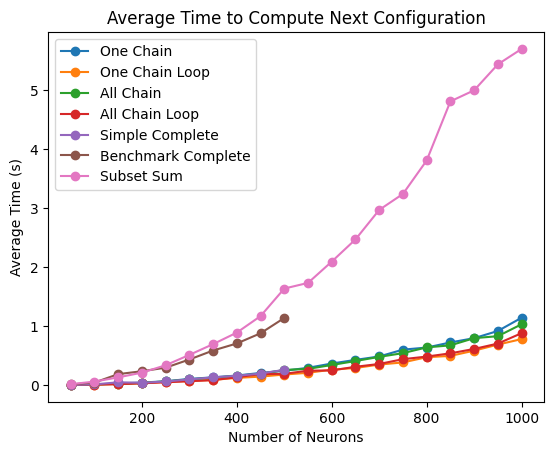

In [55]:
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-', label='One Chain')
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-', label='One Chain Loop')
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-', label='All Chain')
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-', label='All Chain Loop')
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-', label='Simple Complete')
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.plot(ss_avg_times['V'], ss_avg_times['average_time'], 'o-', label='Subset Sum')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()


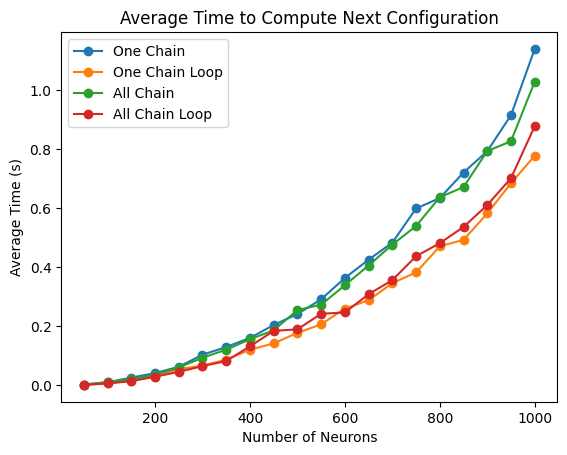

In [56]:
# plot chains
fig, ax = plt.subplots()
ax.plot(oc_avg_times['nodes'], oc_avg_times['average_time'], 'o-', label='One Chain')
ax.plot(ocl_avg_times['nodes'], ocl_avg_times['average_time'], 'o-', label='One Chain Loop')
ax.plot(ac_avg_times['nodes'], ac_avg_times['average_time'], 'o-', label='All Chain')
ax.plot(acl_avg_times['nodes'], acl_avg_times['average_time'], 'o-', label='All Chain Loop')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()

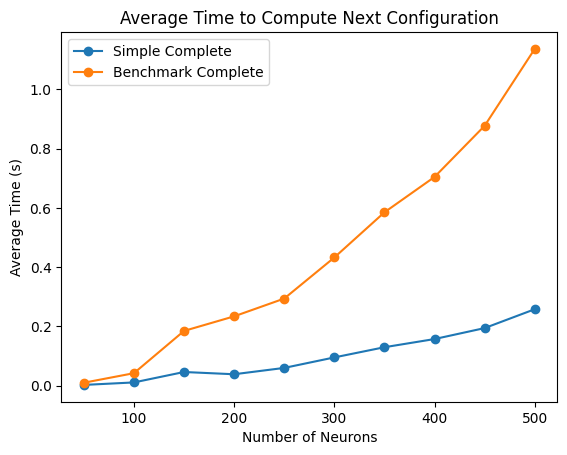

In [57]:
# plot complete graphs
fig, ax = plt.subplots()
ax.plot(sc_avg_times['nodes'], sc_avg_times['average_time'], 'o-', label='Simple Complete')
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()

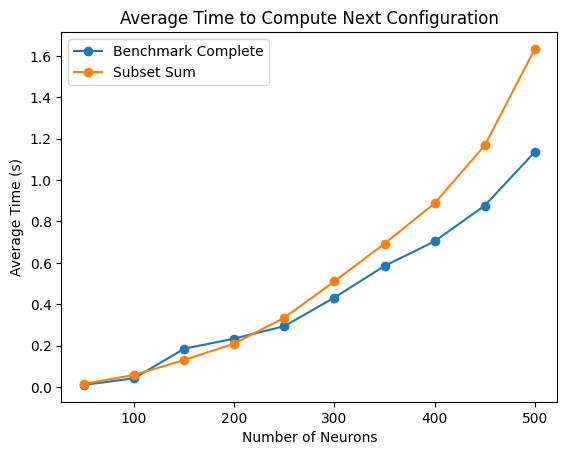

In [58]:
# plot subset sum and complete benchmark up to 500 neurons
fig, ax = plt.subplots()
ss_avg_times_500 = ss_avg_times[ss_avg_times['V'] <= 500]
ax.plot(bc_avg_times['nodes'], bc_avg_times['average_time'], 'o-', label='Benchmark Complete')
ax.plot(ss_avg_times_500['V'], ss_avg_times_500['average_time'], 'o-', label='Subset Sum')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Average Time (s)')
ax.set_title('Average Time to Compute Next Configuration')
ax.legend()
plt.show()